# Manipulando Imagens


In [72]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageDraw
import numpy as np

### Copiando Imagens


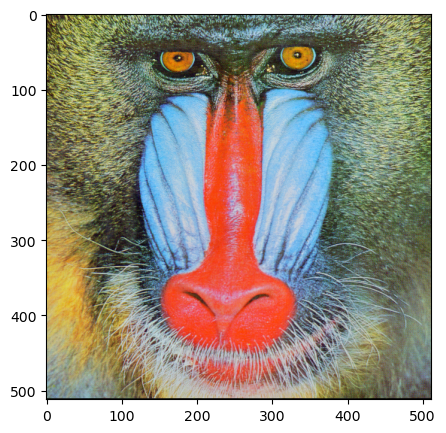

In [25]:
#Imagem Original
babuino = np.array(Image.open("baboon.png"))

plt.figure(figsize=(5,5))
plt.imshow(babuino)
plt.show()

Copiando imagens sem usar o metodo copy() e encontrando o endereço na memoria que sao iguais

In [26]:
#por transferencia direta, o conteudo e endereço sao os mesmos
A = babuino

id(A) == id(babuino)

True

In [27]:
#Usando o copy(), notamos que os endereços de memoria sao diferente
B = babuino.copy()
id(B) == id(babuino)

False

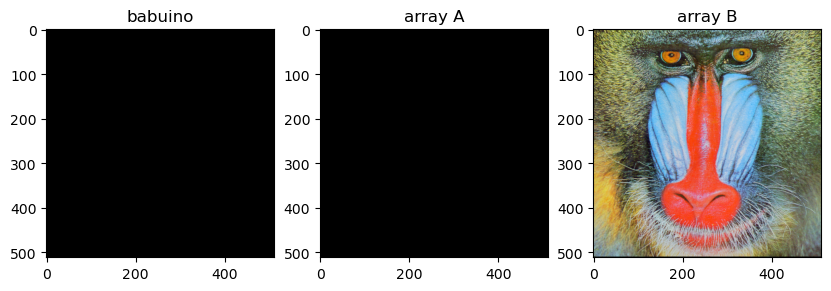

In [28]:
#Se zeramos babuino, A zera tbm e b continua sendo uma copia
babuino[:,:,:,] = 0
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(babuino)
plt.title("babuino")

plt.subplot(132)
plt.imshow(A)
plt.title("array A")

plt.subplot(133)
plt.imshow(B)
plt.title("array B")
plt.show()

### Fipliping Imagens

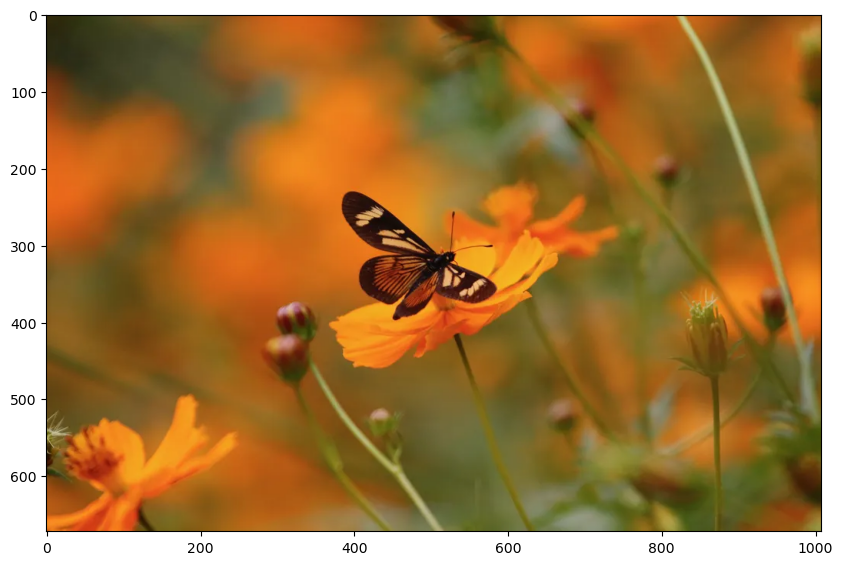

In [29]:
#imagem original
imagem = Image.open("nature.png")
plt.figure(figsize=(10,10))
plt.imshow(imagem)
plt.show()


In [30]:
array_image = np.array(imagem)
largura, altura, canais = array_image.shape
print("Largura: ", largura,"\nAltura: ", altura, "\nCanais: ",canais)

Largura:  672 
Altura:  1008 
Canais:  3


Atribuímos a primeira linha de pixels do array original à última linha do novo array. Repetimos o processo para cada linha, incrementando o número da linha do array original e diminuindo o índice da linha do novo array para atribuir os pixels de forma correspondente. Após a execução do laço for abaixo, array_flip se tornará a imagem invertida

GIF criado como 'rotacao.gif'


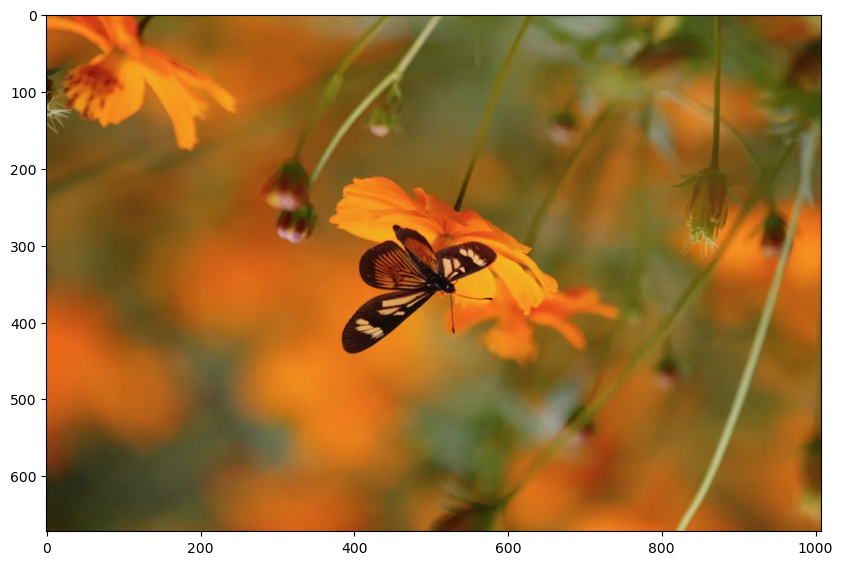

In [31]:
vetor_rotac = np.zeros((largura, altura, canais), dtype=np.uint8)
quadros = []
#rotacionando elem a elem da matriz numerica
for i, row in enumerate(array_image):
    vetor_rotac[largura - 1 - i, :, :] = row


 # Salvar o estado atual como um quadro
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(vetor_rotac)
    ax.axis('off')
    
    # Salvar o quadro como uma imagem na memória
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    quadros.append(Image.fromarray(img))
    plt.close(fig)  # Fecha a figura para evitar sobrecarga

# Criar o GIF a partir dos quadros
quadros[0].save(
    "rotacao.gif",
    save_all=True,
    append_images=quadros[1:],
    duration=10,  # Duração de cada quadro em milissegundos
    loop=0         # Loop infinito
)

print("GIF criado como 'rotacao.gif'")
plt.figure(figsize=(10,10))
plt.imshow(vetor_rotac)
plt.show()


### Usando a função FLip() e Mirror()

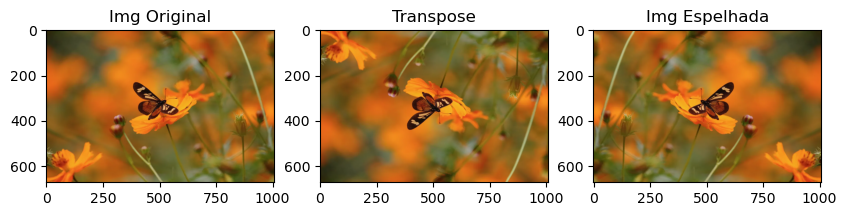

In [32]:
im_flip = ImageOps.flip(imagem)
im_mirror = ImageOps.mirror(imagem)

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(imagem)
plt.title("Img Original")

plt.subplot(132)
plt.imshow(im_flip)
plt.title("Transpose")

plt.subplot(133)
plt.imshow(im_mirror)
plt.title("Img Espelhada")
plt.show()

### Usando a função Transpose() para inverter no eixo Y

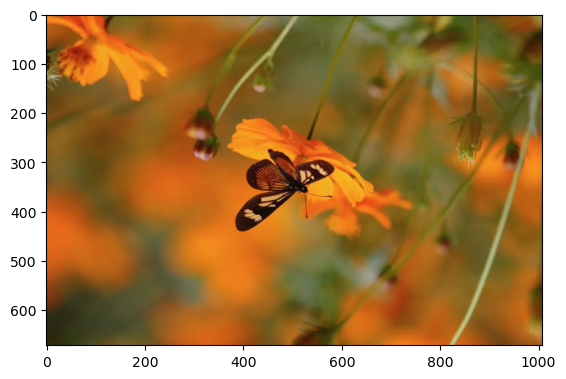

In [33]:
im_flip = imagem.transpose(1)
plt.imshow(im_flip)
plt.show()

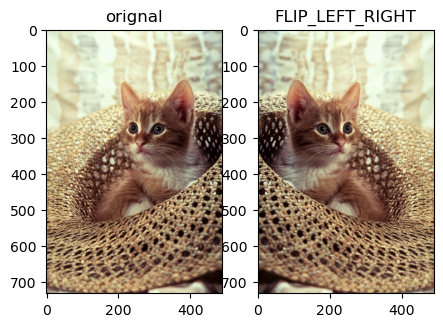

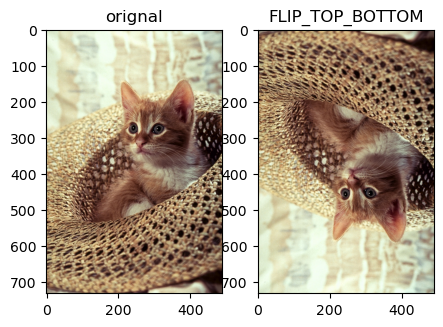

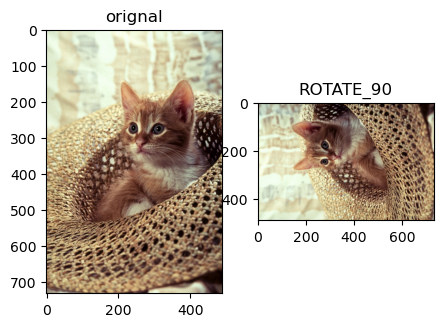

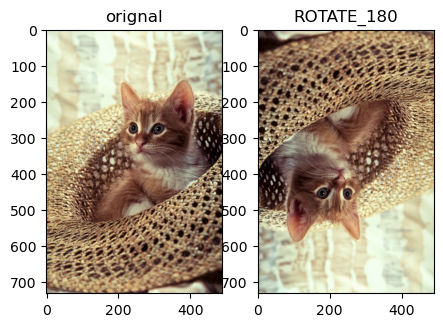

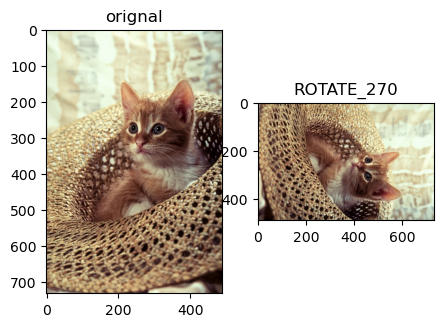

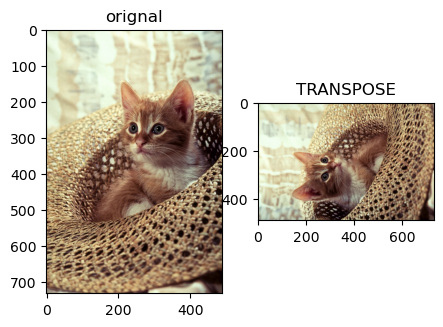

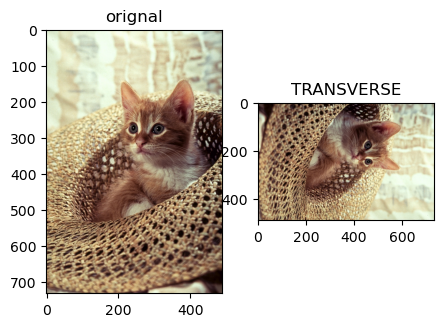

In [34]:
imagem = Image.open("cat.png") #mudei de imagem pra ficar mais facil de indetificar as mudanças
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

for key, values in flip.items():
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(imagem)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(imagem.transpose(values))
    plt.title(key)
    plt.show()

### Cortando Imagens

Text(0.5, 1.0, 'Corte Horizontal')

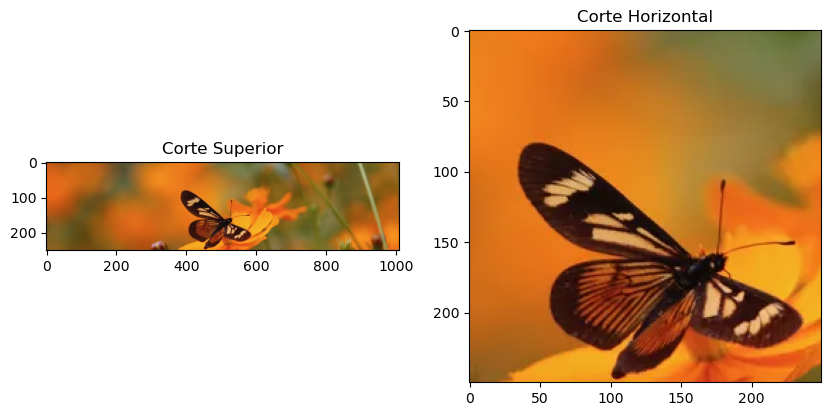

In [50]:
#usando a limite nas matriz para realizar os cortes superior e horizontal
upper = 150
lower = 400
left = 350
right = 600

crop_top = array_image[upper: lower,:,:]
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(crop_top)
plt.title("Corte Superior")

plt.subplot(122)
plt.imshow(crop_horizontal)
plt.title("Corte Horizontal")

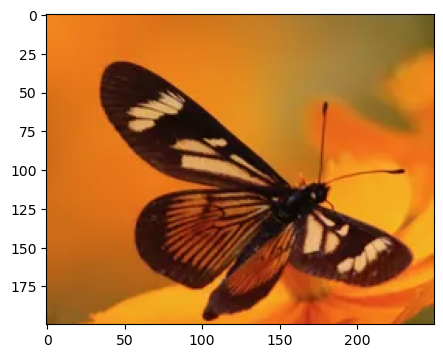

In [59]:
#usando a função crop()

aux_imagem = Image.open("nature.png")
crop_img = aux_imagem.crop((left, 200, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_img)
plt.show()

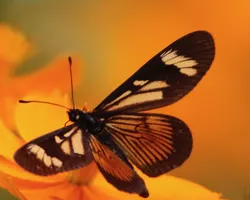

In [62]:
crop_img = crop_img.transpose(Image.FLIP_LEFT_RIGHT)
crop_img

### Fazendo alterações a partir dos canais 

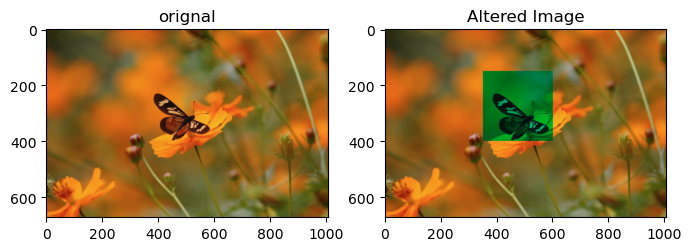

In [71]:
vetor_sqr = np.copy(aux_imagem)
vetor_sqr[upper:lower, left:right, 0:1] = 0

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(aux_imagem)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(vetor_sqr)
plt.title("Altered Image")
plt.show()

### Usando o ImageDraw para modificar imagens

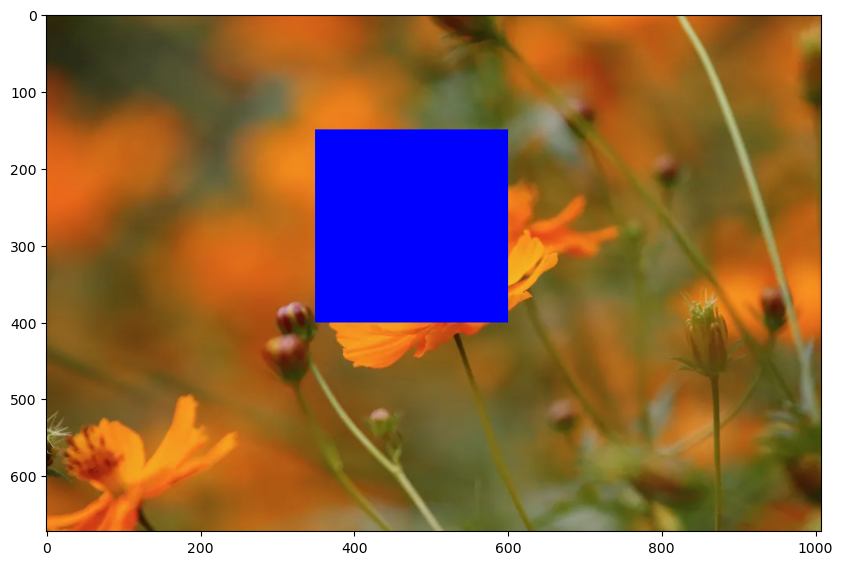

In [77]:
draw_img = aux_imagem.copy()

img_fn = ImageDraw.Draw(im=draw_img)

forma = [left, upper, right, lower]
img_fn.rectangle(xy=forma, fill="blue")

plt.figure(figsize=(10,10))
plt.imshow(draw_img)
plt.show()